# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Zhaowei Li
*   **Student number**: 1007911994



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [59]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [60]:
### YOUR CODE HERE ###
import math
import matplotlib.pyplot as plt
import numpy as np

#1
def time_subplots(cases_raw, country_lst):

  COUNT = len(country_lst)
  ROWS = math.ceil(COUNT/2)
  fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS))

  for i in range(0, COUNT):
    axes.flat[i].set_title(country_lst[i])
    axes.flat[i].plot(cases_raw.columns, cases_raw.loc[country_lst[i]])
    axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))


  plt.show()


In [61]:
#2
from sklearn.preprocessing import StandardScaler

cases_raw_std = StandardScaler().fit_transform(cases_raw)

cases_raw_std_df = pd.DataFrame(cases_raw_std, index=cases_raw.index, columns=cases_raw.columns)

print("For example, {}: Mean is {}, Variance is {}.".format(cases_raw_std_df.columns[0],cases_raw_std[:, 0].mean(),cases_raw_std[:, 0].var()))

For example, 2020-01-22: Mean is -1.8407842895339384e-17, Variance is 0.9999999999999997.


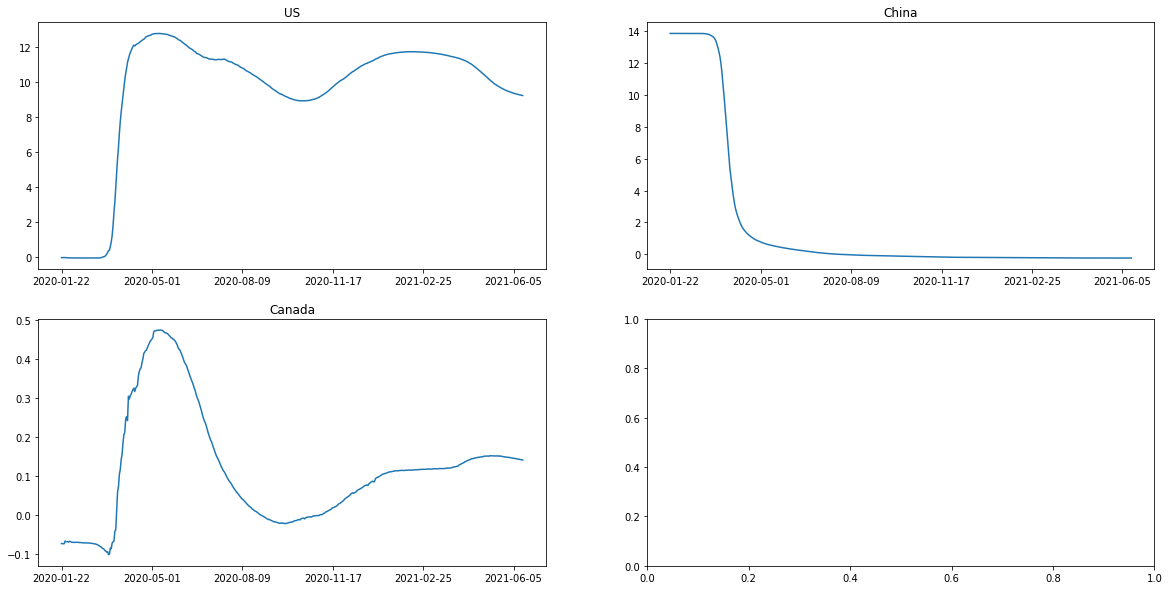

In [62]:
#3
country_lst = ["US", "China","Canada"]

time_subplots(cases_raw_std_df,country_lst)

4. Before 2020-05-01, both US and Canada has a increase from a very low point around 0, though Canada rises to 0.5 while US rises to 12. China has a sharp decrease from a very high point around 14 to 0 before 2020-05-01


After 2020-05-01, China is consistently being at a low point around 0. For US and Canada, both of them decrease after 2020-05-01 and US has a relatively bigger decrease. Then, while Canada keeps at a constant position, US start a new round of increase and decrease from 2020-11-07 to 2021-06-05.

When the curve goes up, it means this specific country's covid cases is continuly having a bigger gap above or smaller gap below the mean of all countries' covid cases on each date.

When the curve goes down, it means this specific country's covid cases is continuly having a smaller gap above or bigger gap below the mean of all countries' covid cases on each date.  

When the sign of value is positive, it means this specific country's covid cases is above the mean of all countries' covid cases on that date.

When the sign of value is negative, it means this specific country's covid cases is below the mean of all countries' covid cases on that date.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [63]:
### YOUR CODE HERE ###

#1
n, m = cases_raw_std.shape

C = np.dot(cases_raw_std.T, cases_raw_std) / (n-1) 

C.shape



(511, 511)

In [64]:
#2
df_cov = pd.DataFrame(C)

def get_sorted_eign(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov) 
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]

  return eigenValues, eigenVectors


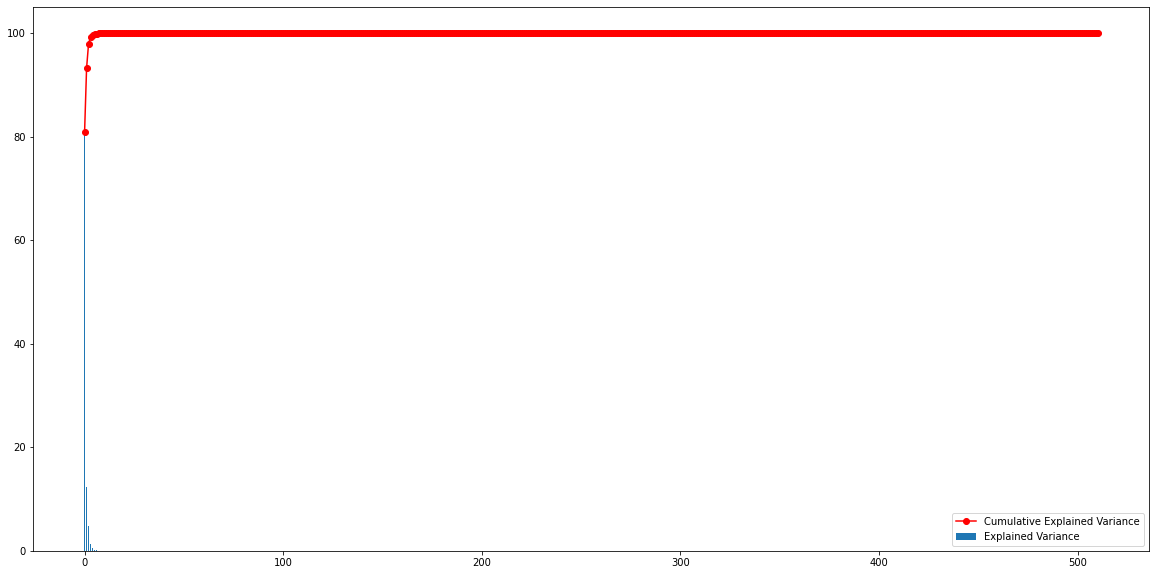

In [65]:
#3
eigenValues, eigenVectors = get_sorted_eign(df_cov)

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.figure(figsize=(20,10))
plt.bar(range(len(expVar)), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()


In [66]:
#4
num_pc = 0
num_99 = 0
for i in cumExpVar:
  if i < 99:
    num_pc = num_pc + 1
  elif i >= 99:
    num_99 = num_99 + 1
    if num_99 == 1:
      num_pc = num_pc + 1
      break

print("I need", num_pc, "PCs to cover 99% of the dataset's variance.")


I need 4 PCs to cover 99% of the dataset's variance.


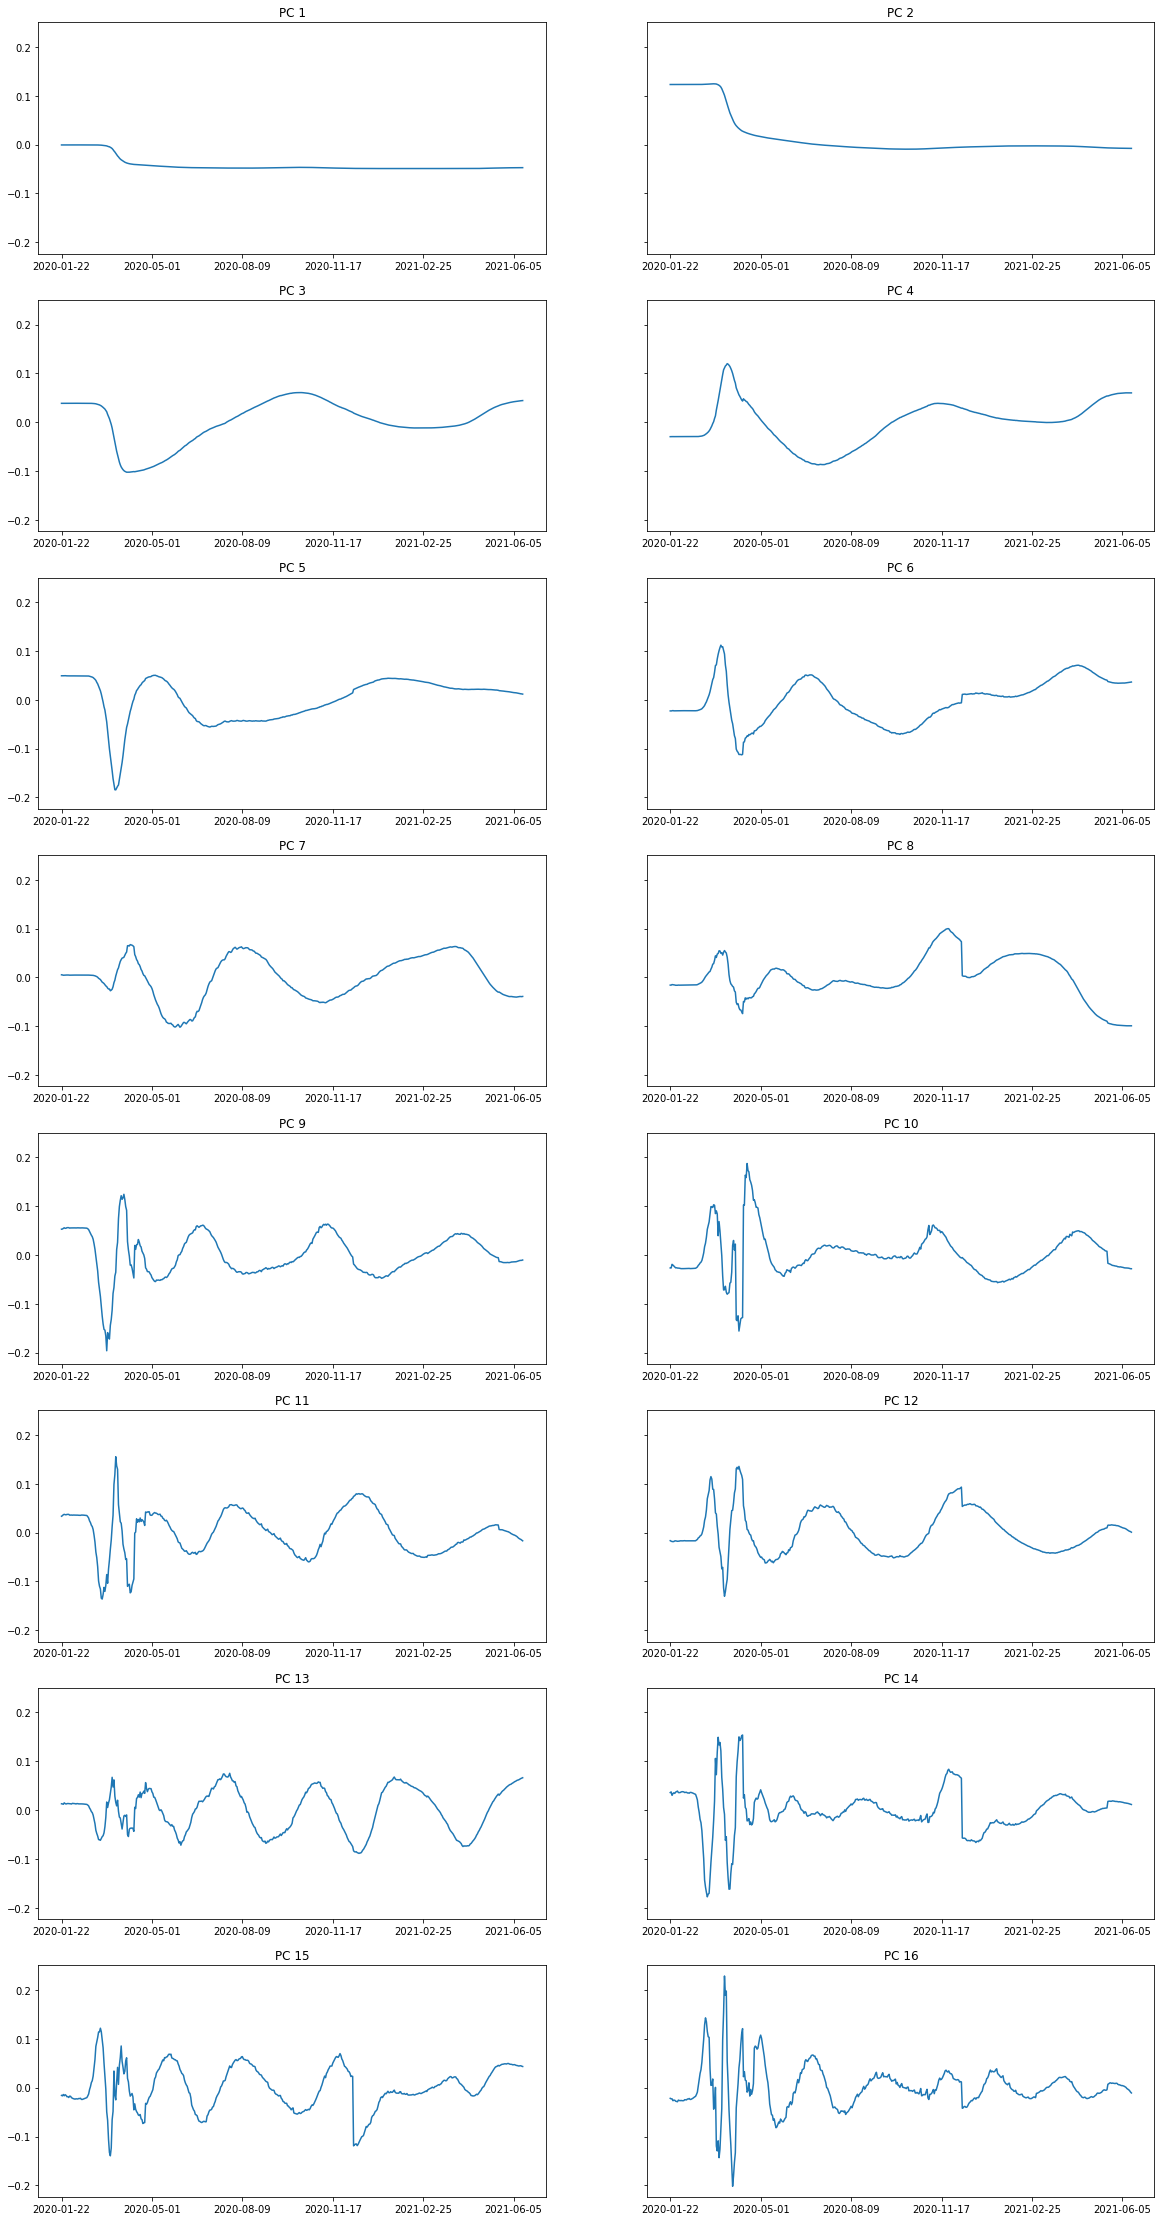

In [67]:
#5
PC_COUNT = 16
ROWS = math.ceil(PC_COUNT/2)
fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS), sharey=True)

for i in range(PC_COUNT):
  W = eigenVectors[:, i]
  axes.flat[i].set_title("PC {}".format(i+1))
  axes.flat[i].plot(cases_raw.columns, W)
  axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))

plt.show()


6. For the first few PCs, each PC's feature positions have very small number of fluctuations around 0. For the rest of the PCs, the trend of each PC's feature positions become continuously more violent and random. 

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [68]:
from sklearn.metrics import mean_squared_error


def Recon_inver(k,original_df,original_std,eigenVectors):
  W = eigenVectors[:, 0:k]
  proj = np.dot(original_std, W)
  Recon = np.dot(proj, W.T)
  Recon_inver = StandardScaler().fit(original_df).inverse_transform(Recon)
  Recon_inver_df = pd.DataFrame(Recon_inver, index=original_df.index, columns=original_df.columns)

  return Recon_inver_df


def plot_country_figures(original_df, country_name):
### YOUR CODE HERE ###
  time_subplots(original_df, country_name)
  


  original_std = StandardScaler().fit_transform(original_df)

  n, m = original_std.shape
  C = np.dot(original_std.T, original_std) / (n-1) 
  
  cov_df = pd.DataFrame(C)

  eigenValues, eigenVectors = get_sorted_eign(cov_df)

  pc_list = [1,2,4,8,6]
    
  COUNT = len(country_name)
  ROWS = math.ceil(COUNT/2)
  fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS))
  fig.suptitle("Reconstruction Data")

  for i in range(0, COUNT):
    axes.flat[i].set_title(country_name[i])
    
    for k in pc_list:
      Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
      axes.flat[i].plot(Recon_inver_df.columns, Recon_inver_df.loc[country_name[i]], label="PC1 to PC{}".format(k) if k!=1 else "PC1 only" )
    
    axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))
    axes.flat[i].legend()

  plt.show()



  COUNT = len(country_name)
  ROWS = math.ceil(COUNT/2)
  fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS))
  fig.suptitle("Residual Error for the Best Reconstruction")

  for i in range(0, COUNT):
    axes.flat[i].set_title(country_name[i])
    
    res_error_lst = list()

    for k in pc_list:
      Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
      res_error = (original_df - Recon_inver_df).values.flat
      res_error_total = 0
      for m in res_error:
        res_error_total = res_error_total + abs(m)
      res_error_lst.append(res_error_total)

    min_error_ix = res_error_lst.index(min(res_error_lst))
    k = pc_list[min_error_ix]

    Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
    res_error = (original_df - Recon_inver_df)
    
    axes.flat[i].plot(res_error.columns, res_error.loc[country_name[i]], label="PC1 to PC{}".format(k) if k!=1 else "PC1 only" )
    axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))
    axes.flat[i].legend()

  plt.show()



  rmse_lst = list()
  num = 0
  num_lst = list()
  for k in range(10):
    Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
    rmse = mean_squared_error(original_df, Recon_inver_df, squared=False)
    rmse_lst.append(rmse)
    num = num + 1
    num_lst.append(num)
  
  plt.figure(figsize=(10,5))
  plt.title("RMSE VS. Number of PCs")
  plt.plot(num_lst,rmse_lst)
  plt.xlabel("Number of PCs")
  plt.ylabel("RMSE")

  plt.show()




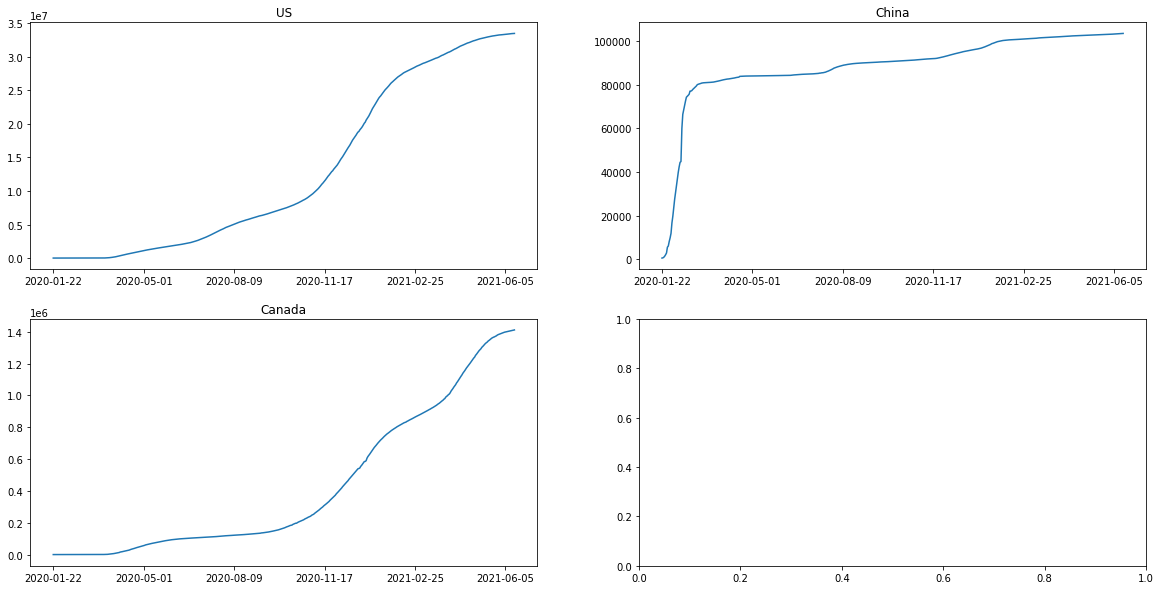

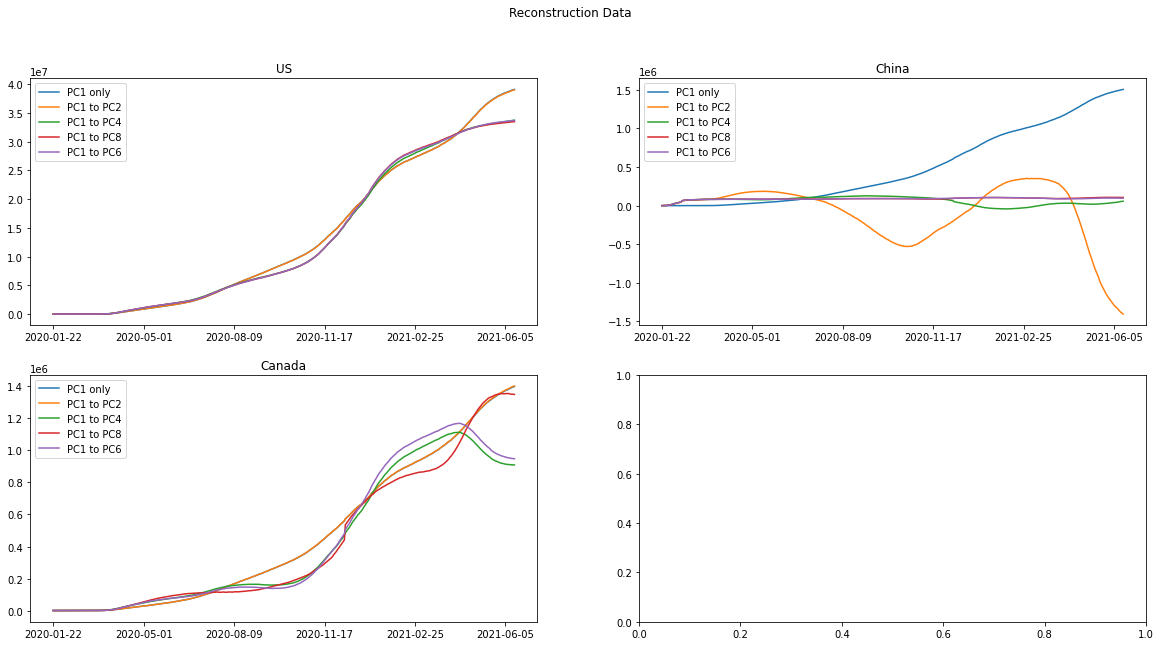

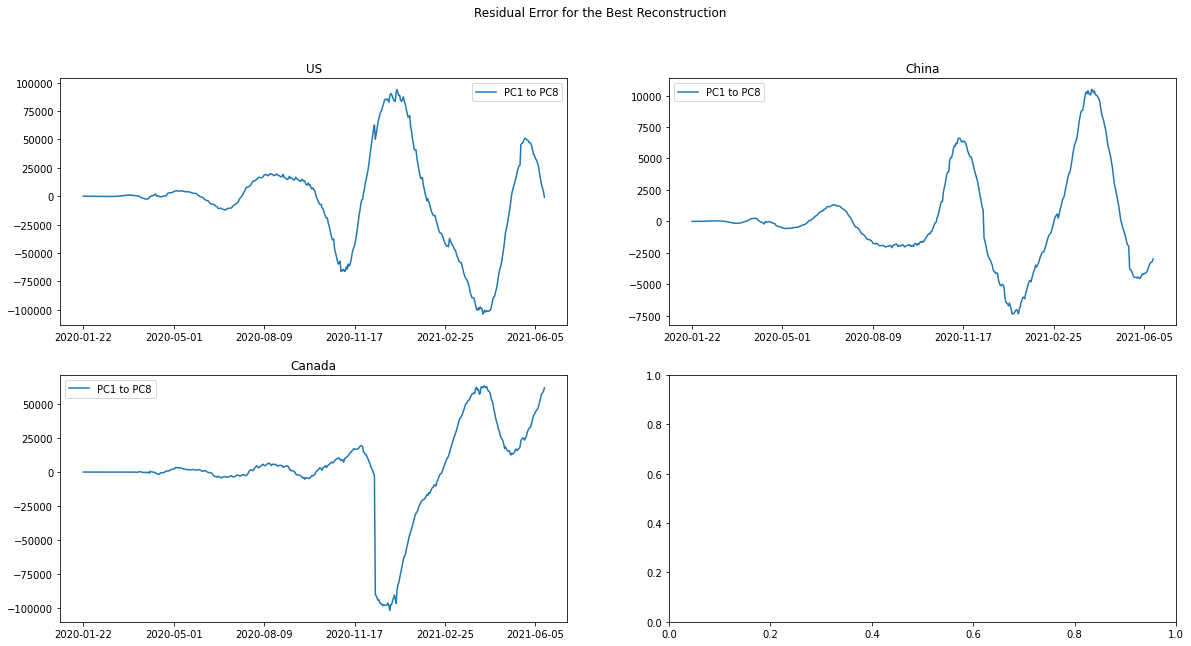

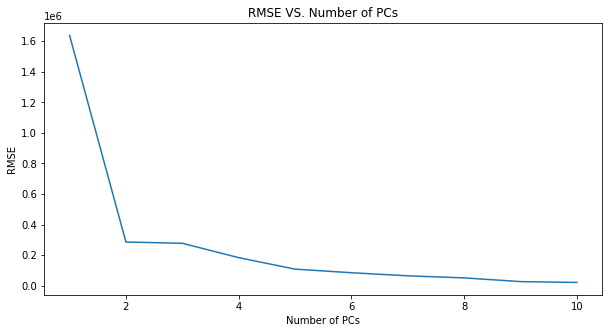

In [69]:
plot_country_figures(cases_raw,country_lst)

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [70]:
### YOUR CODE HERE ###
def plot_country_figures_svd(original_df, country_name):
### YOUR CODE HERE ###
  time_subplots(original_df, country_name)
  


  original_std = StandardScaler().fit_transform(original_df)

  n, m = original_std.shape

  U,S,V = np.linalg.svd(original_std)

  eigenValues = (S**2)/(n-1)
  eigenVectors = V.T 
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]

  pc_list = [1,2,4,8,6]
    
  COUNT = len(country_name)
  ROWS = math.ceil(COUNT/2)
  fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS))
  fig.suptitle("Reconstruction Data")

  for i in range(0, COUNT):
    axes.flat[i].set_title(country_name[i])
    
    for k in pc_list:
      Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
      axes.flat[i].plot(Recon_inver_df.columns, Recon_inver_df.loc[country_name[i]], label="PC1 to PC{}".format(k) if k!=1 else "PC1 only" )
    
    axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))
    axes.flat[i].legend()

  plt.show()



  COUNT = len(country_name)
  ROWS = math.ceil(COUNT/2)
  fig, axes = plt.subplots(ROWS,2,figsize=(10*2,5*ROWS))
  fig.suptitle("Residual Error for the Best Reconstruction")

  for i in range(0, COUNT):
    axes.flat[i].set_title(country_name[i])
    
    res_error_lst = list()

    for k in pc_list:
      Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
      res_error = (original_df - Recon_inver_df).values.flat
      res_error_total = 0
      for m in res_error:
        res_error_total = res_error_total + abs(m)
      res_error_lst.append(res_error_total)

    min_error_ix = res_error_lst.index(min(res_error_lst))
    k = pc_list[min_error_ix]

    Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
    res_error = (original_df - Recon_inver_df)
    
    axes.flat[i].plot(res_error.columns, res_error.loc[country_name[i]], label="PC1 to PC{}".format(k) if k!=1 else "PC1 only" )
    axes.flat[i].set_xticks(np.arange(0,cases_raw.shape[1]+1,100))
    axes.flat[i].legend()

  plt.show()



  rmse_lst = list()
  num = 0
  num_lst = list()
  for k in range(10):
    Recon_inver_df = Recon_inver(k, original_df, original_std, eigenVectors)
    rmse = mean_squared_error(original_df, Recon_inver_df, squared=False)
    rmse_lst.append(rmse)
    num = num + 1
    num_lst.append(num)
  
  plt.figure(figsize=(10,5))
  plt.title("RMSE VS. Number of PCs")
  plt.plot(num_lst,rmse_lst)
  plt.xlabel("Number of PCs")
  plt.ylabel("RMSE")

  plt.show()




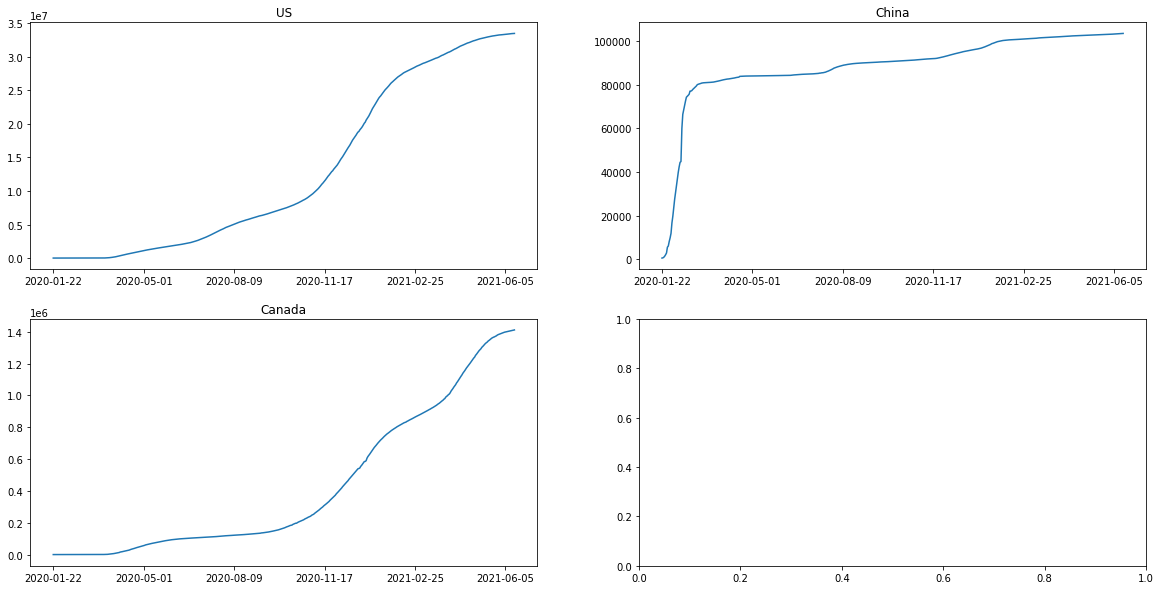

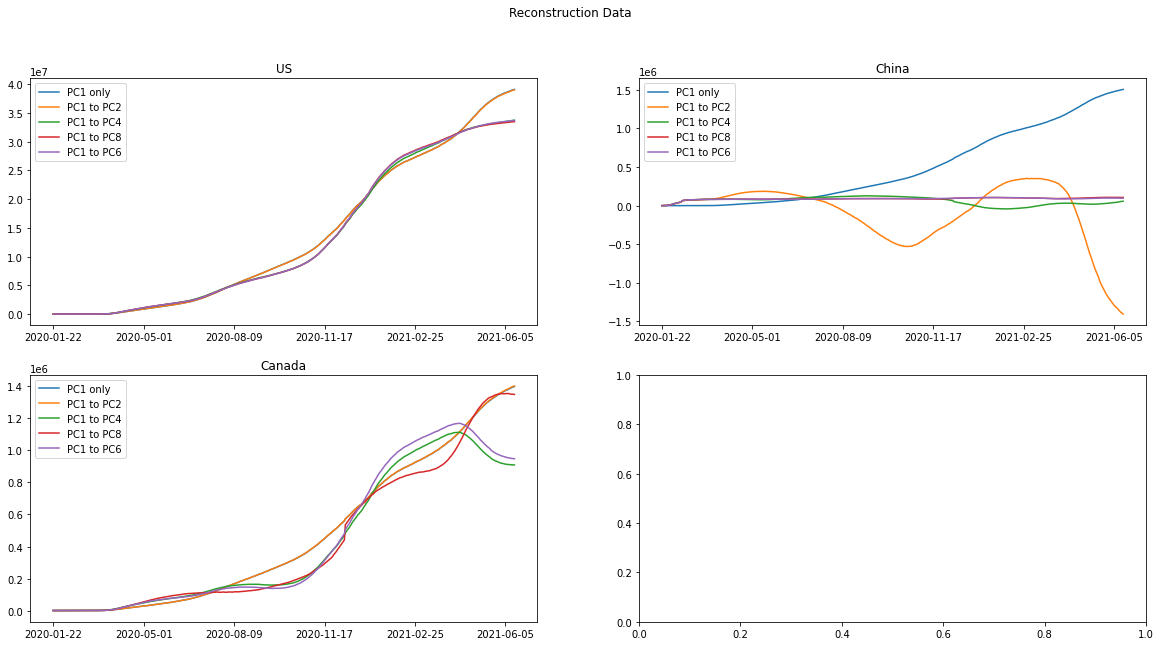

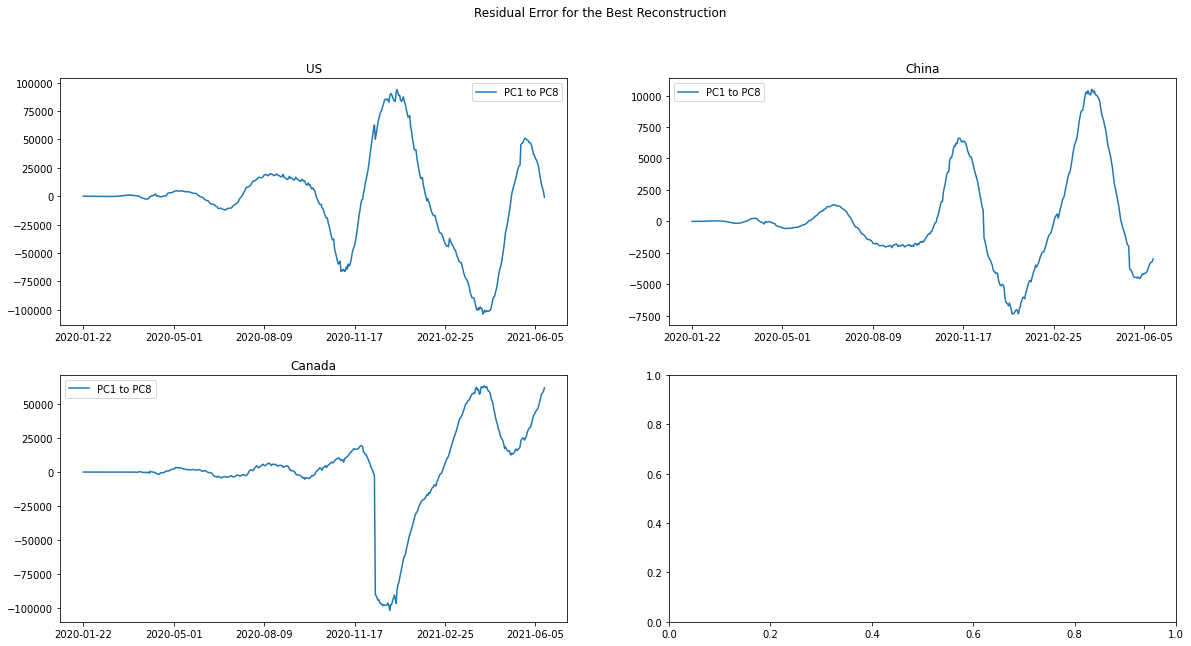

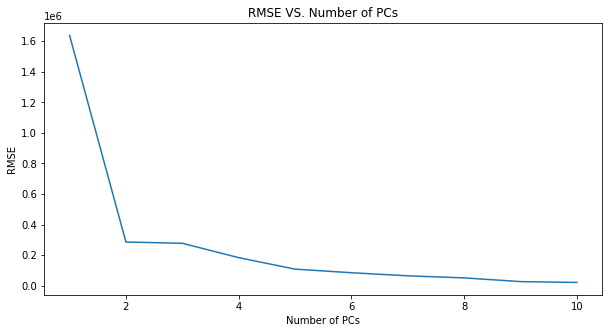

In [71]:
plot_country_figures_svd(cases_raw,country_lst)

When using SVD instead of Eigendecomposition to compute PCA, the covariance is not needed since the eigenvectors and eigenvalues of convariance can be directly computed by using singular values and V in dataset's SVD.

However, the dataset do need to be standardized, because the covariance equation shows that it contains an automatic standardization. If the dataset is not standardized, the eigenvectors and eigenvalues from SVD cannot be equivalent to the covariance's eigenvectors and eigenvalues. Hence, the PCA will not be accurate. Especially when you consider PCA relies on the variance of each feature, it is reasonable to see varainces in different scales cannot provide accurate PCA.

The PCA results from Eigendecompostion and SVD are very much the same.


# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [72]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving formatted_time-series-19-covid-combined_csv.csv to formatted_time-series-19-covid-combined_csv (5).csv


In [73]:
import io

re_cases_raw_df = pd.read_csv(io.StringIO(uploaded['formatted_time-series-19-covid-combined_csv.csv'].decode('utf-8')), index_col=0 , thousands=",")
re_cases_raw_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8830,8861,8891,8934,8988,9016,9039,9067,9111,

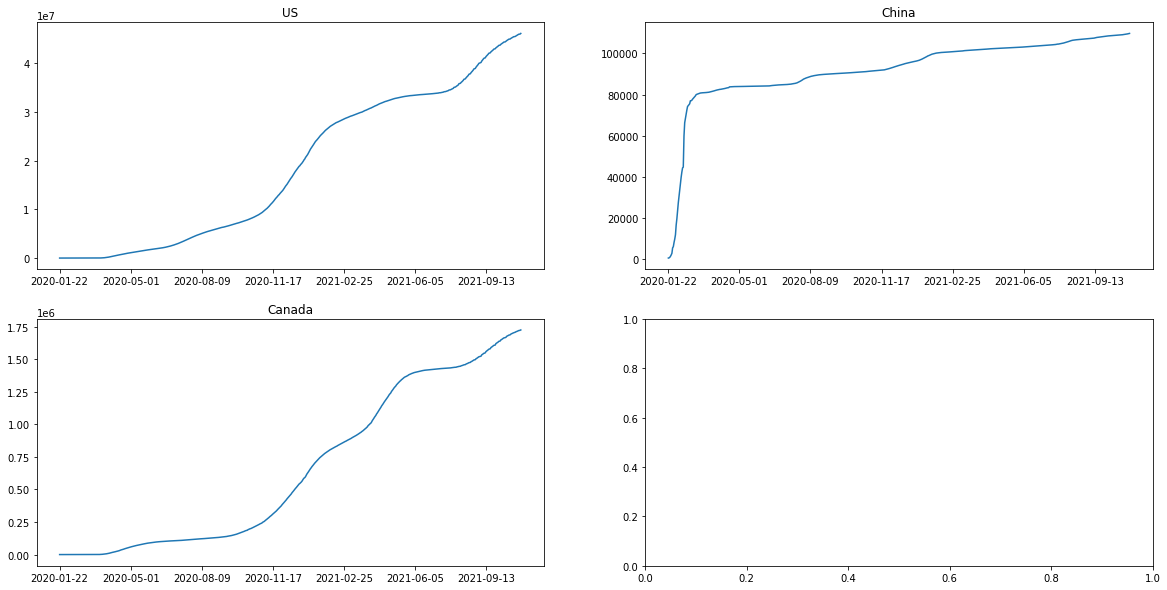

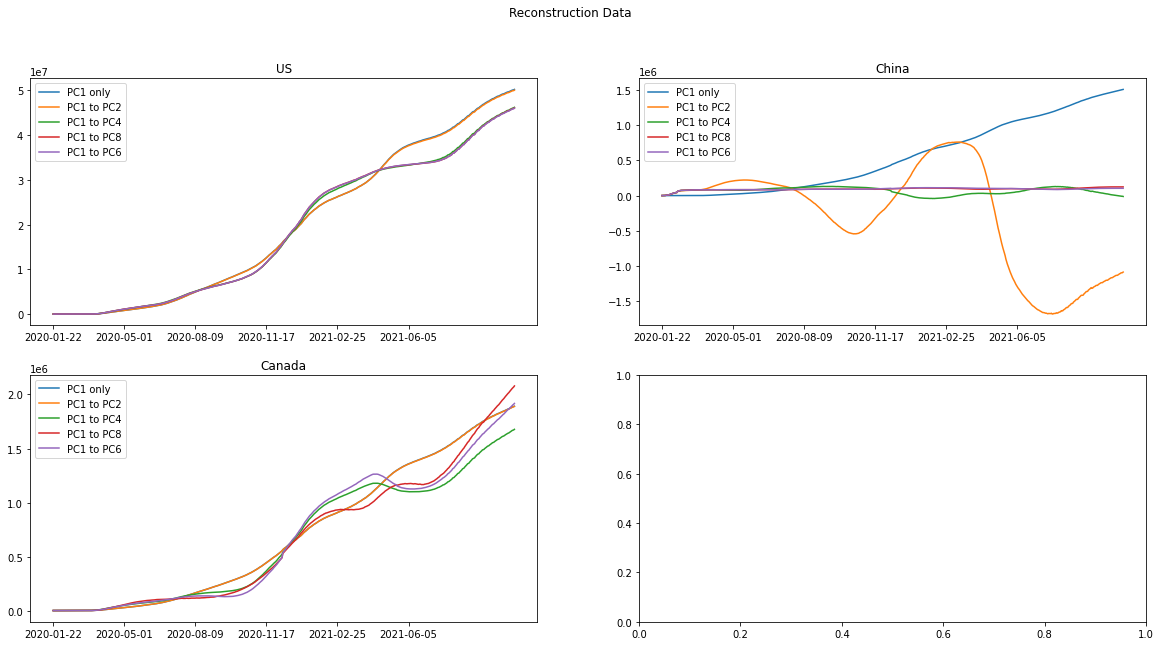

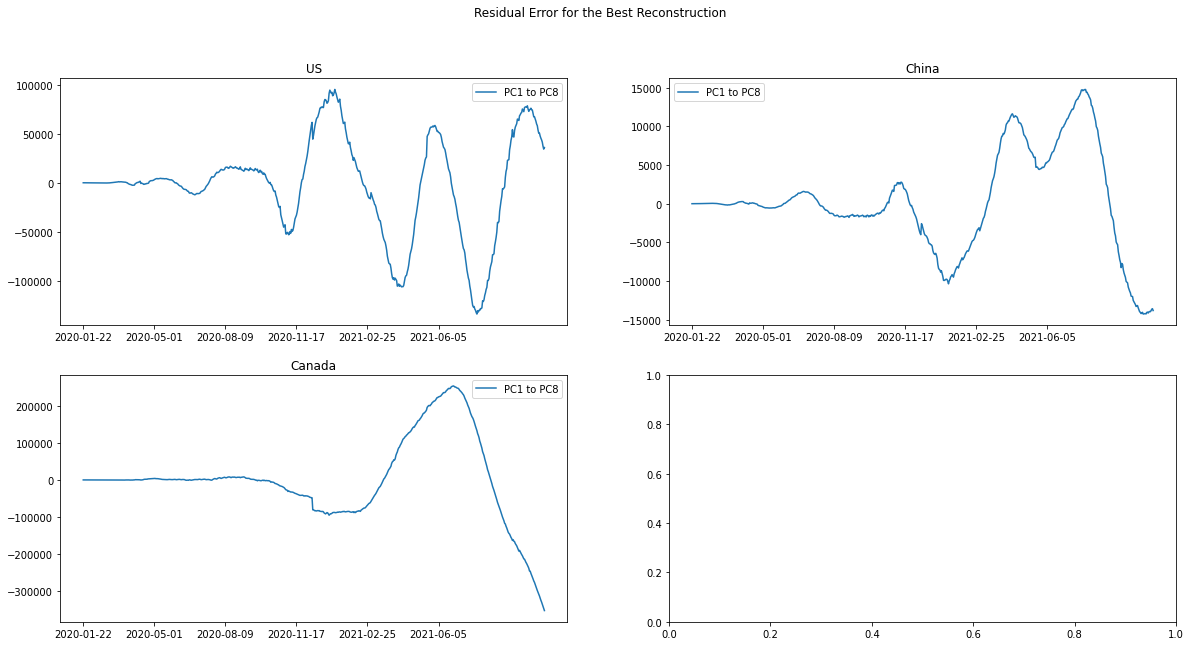

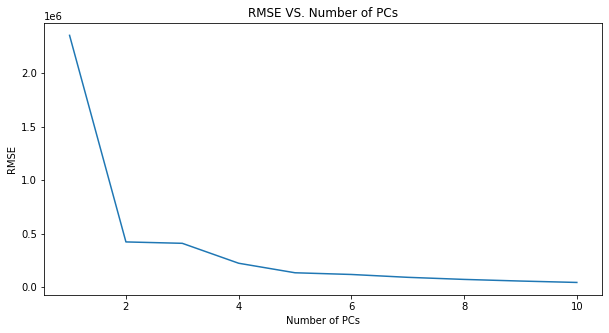

In [74]:
plot_country_figures(re_cases_raw_df,country_lst)

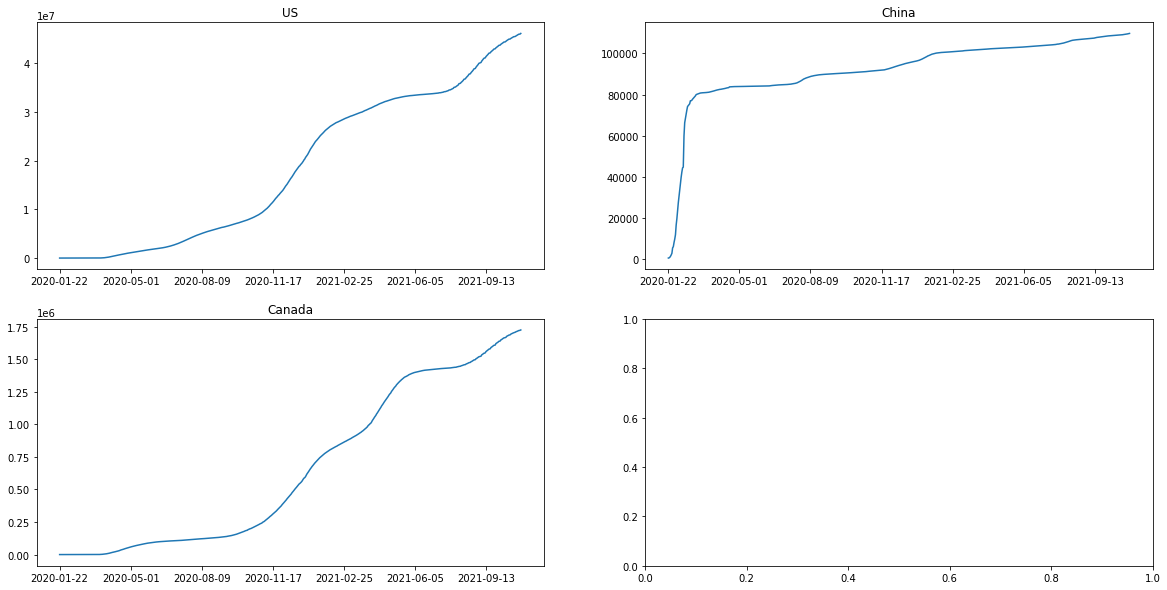

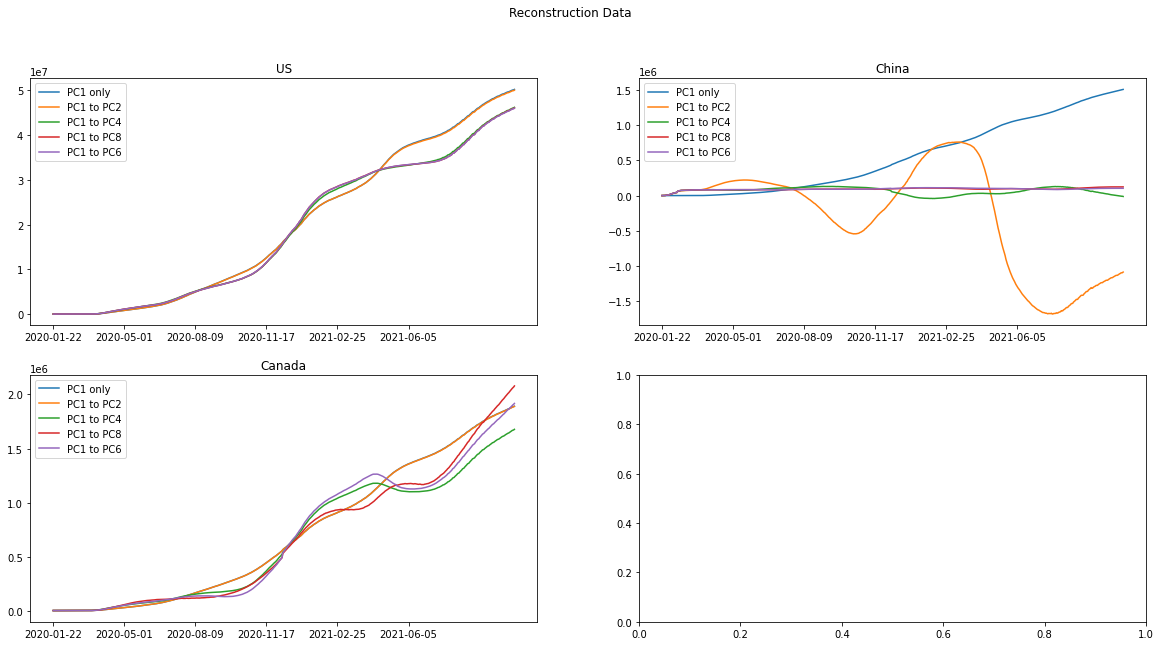

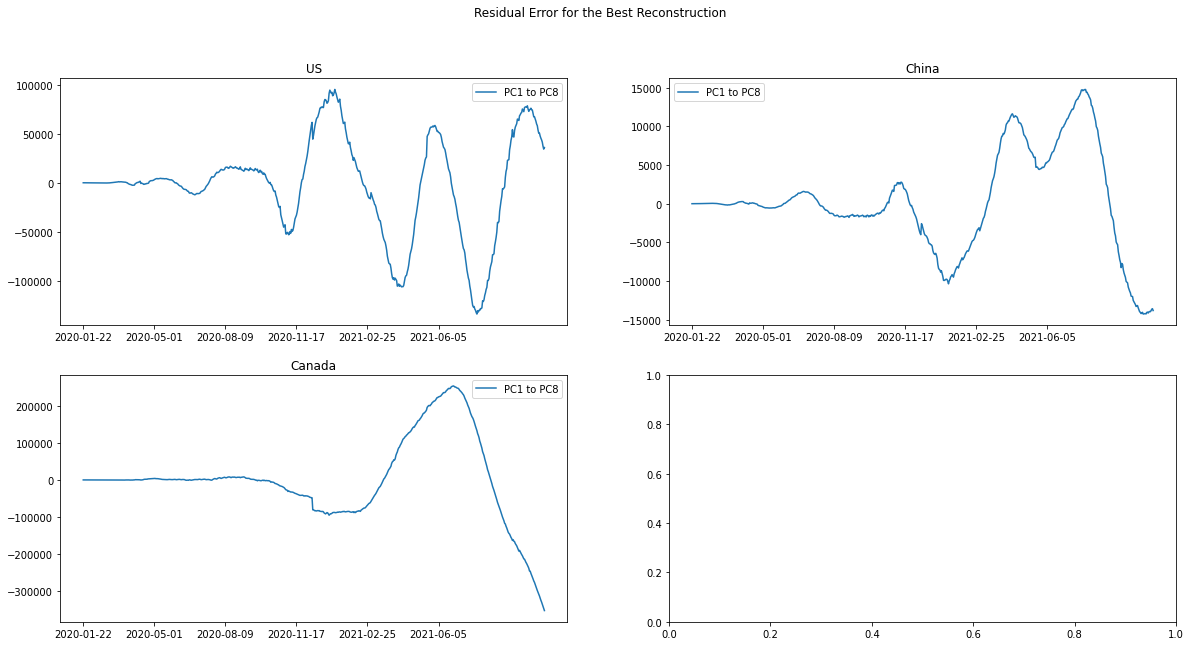

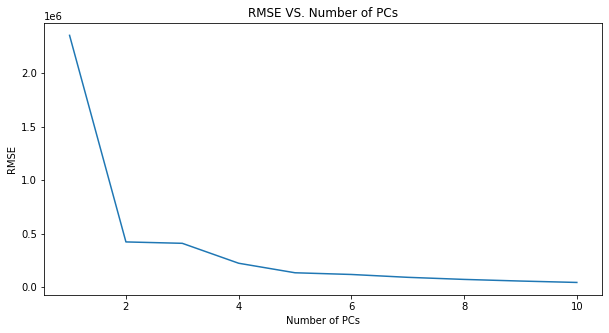

In [75]:
plot_country_figures_svd(re_cases_raw_df,country_lst)

The PCA results from Eigendecompostion and SVD are very much the same.

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

